#### df가 원본 데이터
#### data가 유전자ID 열만 모아놓은 것
    batch와 Condition 열은 제외함.

In [49]:
import pandas as pd
import csv
import numpy

df = pd.read_table('../dataFile/201126/Colon_merged_273samples.txt')

print("Contion열 포함 Original 데이터 프레임 크기:", df.shape,"\n")    

#유전자 이름 list로
only_geneID=df.columns.tolist()[:-2] #제일 마지막 칼럼이 batch, 마지막에서 2번째 칼럼이 condition

# Condition-샘플 이름
condition_list=df['Condition'].tolist()
my_set = set(condition_list) #집합set으로 변환
sampleName = list(my_set) #list로 변환

print(sampleName)
print("샘플 종류",len(sampleName),"개\n")

# batch
batch_list=df['batch'].tolist()
batch_set = set(batch_list) #집합set으로 변환
batchName = list(batch_set) #list로 변환

print(batchName)
print("batch 개수",len(batchName),"개\n")


data=df.loc[:,only_geneID]

print("Condition열 뺀 유전자 발현도만 모아있는 데이터 프레임 크기:", data.shape)
data.head()
#df.head()

Contion열 포함 Original 데이터 프레임 크기: (273, 12979) 

[nan, 'AP', 'adenovillous polyp', 'SSP', 'FAP', 'tubulovillous adenoma', 'tubulovillous polyp', 'Cancer', 'healthy colonic tissue', 'Ca', 'Tubulovillous adenoma', 'HP', 'villous adenoma', 'villoglandular polyp', 'adenomatous polyp', 'TSA', 'serrated adenoma', 'Tubular adenoma', 'SSA/P', 'tubular adenoma', 'sessile serrated adenoma', 'Villous / tubulovillous adenoma', 'NS', 'Control', 'Colorectal adenocarcinoma']
샘플 종류 25 개

['batch1', 'batch2', 'batch4', 'batch3']
batch 개수 4 개

Condition열 뺀 유전자 발현도만 모아있는 데이터 프레임 크기: (273, 12977)


,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9984,9985,9986,9987,9988,9989,999,9990,9993,9994
N1,3.261926,5.542344,3.871889,3.798965,3.301909,4.530116,1.508158,4.371698,3.855534,3.944943,...,5.522298,3.817919,5.275173,6.938187,6.375326,6.390068,9.818748,6.252513,6.474137,4.038488
N2,3.067170,5.769222,3.409645,4.053349,3.064216,4.570496,2.211288,5.440883,3.927214,3.880498,...,5.620879,3.405323,5.440304,7.225440,6.498980,6.301897,9.471316,5.858419,6.450580,4.389834
N3,2.874421,6.154989,3.157981,4.017963,3.360651,4.594367,2.082090,5.156749,3.931030,3.788432,...,5.532340,3.314841,5.344373,7.032817,6.252114,6.623115,9.903985,5.728292,6.703466,4.215545
N4,3.604518,5.178568,3.842628,3.292021,3.171118,4.258140,1.870523,5.542925,4.368619,4.340705,...,4.772041,3.874741,5.722195,6.570667,5.843107,6.190442,9.685986,5.263290,6.751733,3.717602
N5,3.782860,5.516549,3.713573,3.300287,4.080469,4.280303,1.872678,5.634587,4.431263,4.287251,...,4.783519,4.029786,5.814754,6.793116,6.215238,5.985074,9.530748,5.507516,6.553576,3.735276


In [50]:
df.head()

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9986,9987,9988,9989,999,9990,9993,9994,Condition,batch
N1,3.261926,5.542344,3.871889,3.798965,3.301909,4.530116,1.508158,4.371698,3.855534,3.944943,...,5.275173,6.938187,6.375326,6.390068,9.818748,6.252513,6.474137,4.038488,healthy colonic tissue,batch1
N2,3.067170,5.769222,3.409645,4.053349,3.064216,4.570496,2.211288,5.440883,3.927214,3.880498,...,5.440304,7.225440,6.498980,6.301897,9.471316,5.858419,6.450580,4.389834,healthy colonic tissue,batch1
N3,2.874421,6.154989,3.157981,4.017963,3.360651,4.594367,2.082090,5.156749,3.931030,3.788432,...,5.344373,7.032817,6.252114,6.623115,9.903985,5.728292,6.703466,4.215545,healthy colonic tissue,batch1
N4,3.604518,5.178568,3.842628,3.292021,3.171118,4.258140,1.870523,5.542925,4.368619,4.340705,...,5.722195,6.570667,5.843107,6.190442,9.685986,5.263290,6.751733,3.717602,healthy colonic tissue,batch1
N5,3.782860,5.516549,3.713573,3.300287,4.080469,4.280303,1.872678,5.634587,4.431263,4.287251,...,5.814754,6.793116,6.215238,5.985074,9.530748,5.507516,6.553576,3.735276,healthy colonic tissue,batch1


In [51]:
data.columns

Index(['1', '10', '100', '10000', '100009676', '10001', '10003', '10004',
       '100048912', '100049716',
       ...
       '9984', '9985', '9986', '9987', '9988', '9989', '999', '9990', '9993',
       '9994'],
      dtype='object', length=12977)

<b> 샘플 종류 파악하기 </b>

In [52]:
print(len(sampleName)) #질병 개수 106개
column=sampleName[:len(sampleName)+1]
sampleName

25


[nan,
 'AP',
 'adenovillous polyp',
 'SSP',
 'FAP',
 'tubulovillous adenoma',
 'tubulovillous polyp',
 'Cancer',
 'healthy colonic tissue',
 'Ca',
 'Tubulovillous adenoma',
 'HP',
 'villous adenoma',
 'villoglandular polyp',
 'adenomatous polyp',
 'TSA',
 'serrated adenoma',
 'Tubular adenoma',
 'SSA/P',
 'tubular adenoma',
 'sessile serrated adenoma',
 'Villous / tubulovillous adenoma',
 'NS',
 'Control',
 'Colorectal adenocarcinoma']

<b> 각 샘플별 개수 파악하기</b>

In [53]:
# 각 샘플별 개수 
for i in sampleName[1:]:
    print(i,"\t+",df.loc[df["Condition"] == i,:].shape[0])

AP 	+ 10
adenovillous polyp 	+ 4
SSP 	+ 4
FAP 	+ 2
tubulovillous adenoma 	+ 86
tubulovillous polyp 	+ 2
Cancer 	+ 4
healthy colonic tissue 	+ 20
Ca 	+ 2
Tubulovillous adenoma 	+ 8
HP 	+ 10
villous adenoma 	+ 6
villoglandular polyp 	+ 1
adenomatous polyp 	+ 9
TSA 	+ 1
serrated adenoma 	+ 5
Tubular adenoma 	+ 11
SSA/P 	+ 21
tubular adenoma 	+ 18
sessile serrated adenoma 	+ 4
Villous / tubulovillous adenoma 	+ 1
NS 	+ 2
Control 	+ 20
Colorectal adenocarcinoma 	+ 20


In [54]:
df.loc[df["Condition"].isna()] # df.loc[["SSP_4","SSP_8"],:] 같은 의미

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9986,9987,9988,9989,999,9990,9993,9994,Condition,batch
SSP_4,2.678969,5.562394,3.009244,2.579101,3.352881,4.251693,1.820089,4.078985,3.464314,4.196016,...,5.551267,7.015986,6.271153,6.699406,9.993463,5.533864,6.425784,4.194093,NaN,batch2
SSP_8,3.388493,5.331305,4.425484,3.523969,2.994306,4.619105,2.220337,4.422534,2.871913,4.216557,...,5.486888,7.251910,6.791371,6.534864,9.337104,5.705262,6.101527,4.096965,NaN,batch2


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from pandas import DataFrame

# https://note.espriter.net/1326

#predict=pd.DataFrame(df['Condition'].tolist())
predict=df[['Condition']]
predict.columns=['predict']
predict.head()

,predict
N1,healthy colonic tissue
N2,healthy colonic tissue
N3,healthy colonic tissue
N4,healthy colonic tissue
N5,healthy colonic tissue


<b> 이름은 다른데, 같은 샘플들 합치기 </b>

healthy colonic tissue = control = NAN = NS <br>
Tubulovillous adenoma = Villous/Tubluovillous adenoma = tubulovillous polyp = tubulovillous adenoma <br>
sessile serrated adenoma = SSA/P = SSP <br> 
adenomatous polyp = AP <br>
Cancer = Ca = colorectal adenocarcinoma <br>

In [78]:
combine_sampleName=sampleName[:]
combine_sampleName

[nan,
 'AP',
 'adenovillous polyp',
 'SSP',
 'FAP',
 'tubulovillous adenoma',
 'tubulovillous polyp',
 'Cancer',
 'healthy colonic tissue',
 'Ca',
 'Tubulovillous adenoma',
 'HP',
 'villous adenoma',
 'villoglandular polyp',
 'adenomatous polyp',
 'TSA',
 'serrated adenoma',
 'Tubular adenoma',
 'SSA/P',
 'tubular adenoma',
 'sessile serrated adenoma',
 'Villous / tubulovillous adenoma',
 'NS',
 'Control',
 'Colorectal adenocarcinoma']

In [79]:
NS=['healthy colonic tissue', 'Control', 'NS']
print(NS[0])

for i in NS:
    predict.loc[predict["predict"] == i,:] = NS[0]

# NAN값인 샘플들 NS[0]으로 변경
predict.loc[["SSP_4"],"predict"]=NS[0]
predict.loc[["SSP_8"],"predict"]=NS[0]

# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

healthy colonic tissue


C:\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A va

['AP',
 'adenovillous polyp',
 'SSP',
 'FAP',
 'tubulovillous adenoma',
 'tubulovillous polyp',
 'Cancer',
 'healthy colonic tissue',
 'Ca',
 'Tubulovillous adenoma',
 'HP',
 'villous adenoma',
 'villoglandular polyp',
 'adenomatous polyp',
 'TSA',
 'serrated adenoma',
 'Tubular adenoma',
 'SSA/P',
 'tubular adenoma',
 'sessile serrated adenoma',
 'Villous / tubulovillous adenoma',
 'Colorectal adenocarcinoma']

In [80]:
TubA=['Tubulovillous adenoma', 'Villous / tubulovillous adenoma', 'tubulovillous polyp', 'tubulovillous adenoma', 'villous adenoma']
print(TubA[0])

for i in TubA:
    predict.loc[predict["predict"] == i,:] = TubA[0]
    
# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

Tubulovillous adenoma


C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['tubular adenoma',
 'sessile serrated adenoma',
 'villoglandular polyp',
 'FAP',
 'Ca',
 'adenomatous polyp',
 'AP',
 'Cancer',
 'adenovillous polyp',
 'healthy colonic tissue',
 'TSA',
 'serrated adenoma',
 'Tubular adenoma',
 'SSP',
 'SSA/P',
 'HP',
 'Tubulovillous adenoma',
 'Colorectal adenocarcinoma']

In [81]:
SSP=['sessile serrated adenoma', 'SSA/P', 'SSP']
print(SSP[0])

for i in SSP:
    predict.loc[predict["predict"] == i,:] = SSP[0]
    
# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

sessile serrated adenoma


C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['tubular adenoma',
 'sessile serrated adenoma',
 'villoglandular polyp',
 'FAP',
 'Ca',
 'adenomatous polyp',
 'AP',
 'Cancer',
 'adenovillous polyp',
 'healthy colonic tissue',
 'TSA',
 'serrated adenoma',
 'Tubular adenoma',
 'Tubulovillous adenoma',
 'HP',
 'Colorectal adenocarcinoma']

In [82]:
AP=['adenomatous polyp', 'AP']
print(AP[0])

for i in AP:
    predict.loc[predict["predict"] == i,:] = AP[0]
    
# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

adenomatous polyp


C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['tubular adenoma',
 'sessile serrated adenoma',
 'villoglandular polyp',
 'FAP',
 'Ca',
 'adenomatous polyp',
 'Cancer',
 'adenovillous polyp',
 'healthy colonic tissue',
 'TSA',
 'serrated adenoma',
 'Tubular adenoma',
 'Tubulovillous adenoma',
 'HP',
 'Colorectal adenocarcinoma']

In [83]:
Cancer=['Cancer', 'Ca', 'Colorectal adenocarcinoma']
print(Cancer[0])

for i in Cancer:
    predict.loc[predict["predict"] == i,:] = Cancer[0]
    
# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

Cancer


C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['tubular adenoma',
 'sessile serrated adenoma',
 'villoglandular polyp',
 'FAP',
 'adenomatous polyp',
 'Cancer',
 'adenovillous polyp',
 'healthy colonic tissue',
 'TSA',
 'serrated adenoma',
 'Tubular adenoma',
 'Tubulovillous adenoma',
 'HP']

In [84]:
TA=['tubular adenoma', 'Tubular adenoma']
print(TA[0])

for i in TA:
    predict.loc[predict["predict"] == i,:] = TA[0]
    
# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

tubular adenoma


C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['tubular adenoma',
 'sessile serrated adenoma',
 'villoglandular polyp',
 'FAP',
 'adenomatous polyp',
 'Cancer',
 'adenovillous polyp',
 'healthy colonic tissue',
 'TSA',
 'serrated adenoma',
 'Tubulovillous adenoma',
 'HP']

<b> 합치고 난 최종 샘플 종류와 개수 </b>

In [85]:
for i in combine_sampleName:
    print(i,"\t+",predict.loc[predict["predict"] == i,:].shape[0])

tubular adenoma 	+ 29
sessile serrated adenoma 	+ 29
villoglandular polyp 	+ 1
FAP 	+ 2
adenomatous polyp 	+ 19
Cancer 	+ 26
adenovillous polyp 	+ 4
healthy colonic tissue 	+ 44
TSA 	+ 1
serrated adenoma 	+ 5
Tubulovillous adenoma 	+ 103
HP 	+ 10


<b> 샘플 -> 숫자 매핑 </b>

In [86]:
num=1
for i in combine_sampleName:
    print(i)
    predict.loc[predict["predict"] == i,:] = num
    num =num+1
print(num)
predict.head(50)

tubular adenoma
sessile serrated adenoma
villoglandular polyp
FAP
adenomatous polyp
Cancer
adenovillous polyp
healthy colonic tissue
TSA
serrated adenoma
Tubulovillous adenoma
HP
13


C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,predict
N1,8
N2,8
N3,8
N4,8
N5,8
N6,8
N7,8
N8,8
N9,8
N10,8


<b> Kmeans 수행 </b>

In [88]:
# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(data)

# concatenate labels to df as a new column
r = pd.concat([data, predict],axis=1)

print(r)
r.tail()

                 1        10       100     10000  100009676     10001  \
N1        3.261926  5.542344  3.871889  3.798965   3.301909  4.530116   
N2        3.067170  5.769222  3.409645  4.053349   3.064216  4.570496   
N3        2.874421  6.154989  3.157981  4.017963   3.360651  4.594367   
N4        3.604518  5.178568  3.842628  3.292021   3.171118  4.258140   
N5        3.782860  5.516549  3.713573  3.300287   4.080469  4.280303   
...            ...       ...       ...       ...        ...       ...   
SSA.P.17  3.168203  5.081238  4.153700  3.908562   3.001588  4.820424   
SSA.P.18  3.410563  5.201103  4.187524  3.360113   3.153917  4.409013   
SSA.P.19  3.406845  5.773570  3.531418  3.018848   3.639411  4.293574   
SSA.P.20  4.509260  5.044354  4.378324  2.642289   3.138742  4.623012   
SSA.P.21  2.730068  4.509664  3.548250  3.175807   3.477712  4.862594   

             10003     10004  100048912  100049716  ...      9985      9986  \
N1        1.508158  4.371698   3.855534   3.

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9985,9986,9987,9988,9989,999,9990,9993,9994,predict
SSA.P.17,3.168203,5.081238,4.153700,3.908562,3.001588,4.820424,2.375645,4.338708,2.365043,4.184505,...,4.138788,5.260717,7.384413,6.669456,7.059780,9.732668,5.865699,5.975860,4.325534,2
SSA.P.18,3.410563,5.201103,4.187524,3.360113,3.153917,4.409013,1.234972,4.013469,3.833025,4.610452,...,3.597399,5.916054,6.762080,5.888897,5.929257,9.333012,5.110429,6.639432,3.561905,2
SSA.P.19,3.406845,5.773570,3.531418,3.018848,3.639411,4.293574,1.231854,3.649411,2.929373,4.054895,...,4.221285,5.698377,6.888883,5.851999,6.271824,9.875977,5.694509,6.718095,3.601179,2
SSA.P.20,4.509260,5.044354,4.378324,2.642289,3.138742,4.623012,1.817323,4.769140,4.351938,4.410926,...,4.085452,6.499885,6.110657,4.823076,5.800136,9.183178,3.784187,6.986361,2.433076,2
SSA.P.21,2.730068,4.509664,3.548250,3.175807,3.477712,4.862594,1.629351,4.782584,2.797801,3.911247,...,4.495704,5.875531,6.724426,5.662410,7.044568,10.018633,5.732676,6.664638,4.152600,2


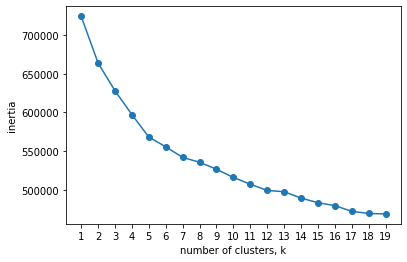

In [89]:
ks = range(1,20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(r)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

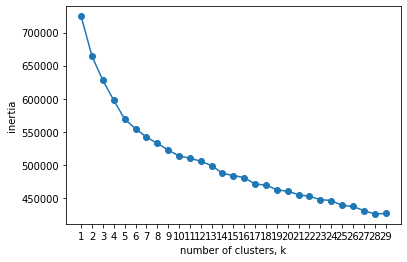

In [90]:
ks = range(1,30)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(r)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

model = KMeans(n_clusters=14)
model.fit(r)

centers = pd.DataFrame(model.cluster_centers_)
center_x = centers[0]
center_y = centers[1]

plt.scatter(center_x,center_y,s=20,marker='D',c='r')
plt.show()

### PCA 수행
https://ssungkang.tistory.com/entry/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5-PCA-2-python-%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-PCA-%EC%8B%A4%EC%8A%B5 참고

In [91]:
X=data.to_numpy()

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

pca=PCA() #주성분 개수 지정하지 않고 클래스생성
pca.fit(X)  #주성분 분석
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.95) + 1 # 분산의 설명량이 95%이상 되는 차원의 수
num_d

182

http://textmining.kr/?p=362

In [93]:
pca = PCA(n_components = 0.95)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents)

principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,-24.553686,-15.015256,-5.831985,16.482608,-6.824852,-1.089348,-8.464772,1.692172,-2.058985,7.538832,...,-0.426893,-0.768461,-0.561411,1.165550,0.985727,-1.429772,-1.821885,-0.171710,-1.368632,0.121021
1,-25.693020,-9.528142,-10.548766,16.507131,-10.318700,2.238103,0.674255,0.170031,1.498166,8.710122,...,1.056524,0.912954,0.521402,0.050387,-0.190006,-0.310618,-0.542915,-1.520767,1.486780,0.122532
2,-28.868225,-19.467795,-4.592718,11.316603,-3.060169,-8.172802,-3.670357,-2.333017,-2.352499,3.636330,...,1.816342,1.145822,-0.679539,-0.500959,-0.311539,-0.186828,1.566382,2.294831,-0.266609,0.438142
3,-40.097422,13.818822,6.249908,-1.348040,3.469031,-2.728407,-4.220491,-8.264833,0.554320,-6.210850,...,0.469449,0.993128,1.470901,-0.386907,0.150276,0.299350,0.792087,0.322922,-0.568536,0.397358
4,-38.785701,11.375474,-1.382093,1.055907,-2.043562,2.978032,2.238370,-8.545329,2.491071,-5.504408,...,0.197735,0.926956,3.205617,-0.502877,-0.507123,0.112172,-0.151523,-1.586798,1.263161,0.335960


In [94]:
y=pd.DataFrame(r['predict'].tolist())
y.columns=['predict']
y.head()

,predict
0,8
1,8
2,8
3,8
4,8


In [95]:
finalDataFrame =pd.concat([principalDf, y], axis=1)
finalDataFrame.head()

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,predict
0,-24.553686,-15.015256,-5.831985,16.482608,-6.824852,-1.089348,-8.464772,1.692172,-2.058985,7.538832,...,-0.768461,-0.561411,1.165550,0.985727,-1.429772,-1.821885,-0.171710,-1.368632,0.121021,8
1,-25.693020,-9.528142,-10.548766,16.507131,-10.318700,2.238103,0.674255,0.170031,1.498166,8.710122,...,0.912954,0.521402,0.050387,-0.190006,-0.310618,-0.542915,-1.520767,1.486780,0.122532,8
2,-28.868225,-19.467795,-4.592718,11.316603,-3.060169,-8.172802,-3.670357,-2.333017,-2.352499,3.636330,...,1.145822,-0.679539,-0.500959,-0.311539,-0.186828,1.566382,2.294831,-0.266609,0.438142,8
3,-40.097422,13.818822,6.249908,-1.348040,3.469031,-2.728407,-4.220491,-8.264833,0.554320,-6.210850,...,0.993128,1.470901,-0.386907,0.150276,0.299350,0.792087,0.322922,-0.568536,0.397358,8
4,-38.785701,11.375474,-1.382093,1.055907,-2.043562,2.978032,2.238370,-8.545329,2.491071,-5.504408,...,0.926956,3.205617,-0.502877,-0.507123,0.112172,-0.151523,-1.586798,1.263161,0.335960,8


In [96]:
labels = []
yList = y.values.tolist()
for label in yList:
    if label[0] not in labels:
        labels.append(label[0])
    
labels

[8, 1, 11, 6, 2, 9, 4, 10, 7, 3, 5, 12]

In [97]:
sortedLabels=sorted(labels)
sortedLabels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

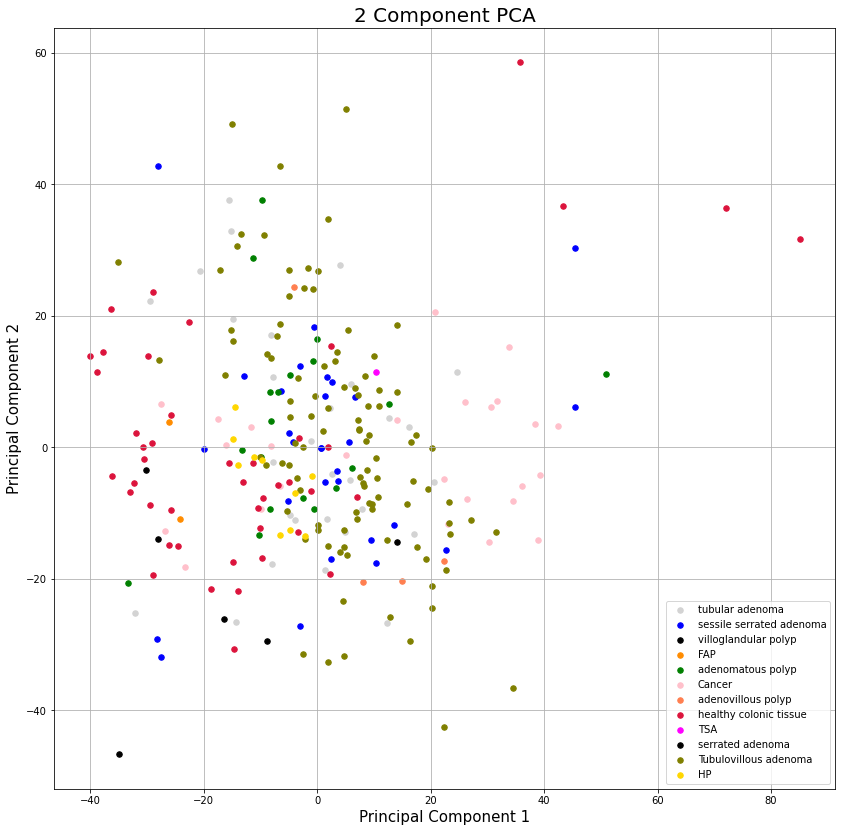

In [100]:
fig = plt.figure(figsize = (14,14))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

'''
colors = ["black","grey","lightgray","lightcoral","maroon",
         "mistyrose","coral","peachpuff","darkorange","darkgoldenrod",
         "olive","yellowgreen","lawngreen","lightgreen","g",
         "mediumseagreen","mediumaquamarine","darkslategray","c","cadetblue",
         "dodgerblue","slategrey","darkblue","rebeccapurple","crimson",
          "fuchsia"]
'''
colors=["lightgray", "blue", "black", "darkorange", "green", "pink", 
        "coral", "crimson", "fuchsia", "black", "olive", "gold", "red"]

for label, color in zip(sortedLabels, colors):
    indicesToKeep = finalDataFrame['predict'] == label
    ax.scatter(
        finalDataFrame.loc[indicesToKeep, 0]
               , finalDataFrame.loc[indicesToKeep, 1]
              
               , c = color
               , s = 30
              )

ax.legend(combine_sampleName)
ax.grid()
plt.savefig("only-PCA.png")

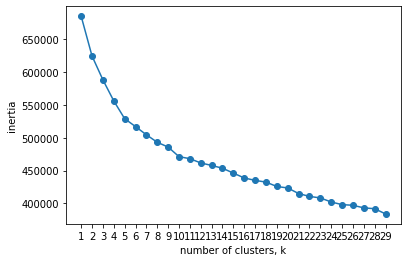

In [101]:
ks = range(1,30)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(principalDf)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [102]:
model = KMeans(n_clusters=10)
model.fit(principalDf)
centers = pd.DataFrame(model.cluster_centers_)
print(centers.shape)
centers.head()

(10, 182)


,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,2.559326,6.507774,-1.363135,-2.045971,2.733876,-0.449029,-3.614844,1.798284,-0.521808,0.261401,...,-0.264031,-0.209147,0.125895,0.113588,0.161175,0.034808,0.079508,0.138725,0.126722,0.410146
1,-15.241590,3.973875,-15.152541,-0.284684,19.578829,5.576902,5.465115,6.232278,2.255888,2.962382,...,-0.154913,-0.000807,-0.035825,-0.151360,-0.236211,0.159931,-0.073535,-0.128584,0.344555,-0.206542
2,-29.388228,5.874144,-0.643068,5.852689,-2.460029,0.993946,-2.874312,-3.452924,1.739432,-0.869022,...,0.217239,0.248709,0.478251,-0.250393,0.246055,-0.032652,-0.071985,0.149064,0.216010,-0.162634
3,-6.690221,-12.426062,-10.895731,6.175108,-1.510475,-2.099903,-1.695704,-1.370713,-1.051526,-1.076062,...,0.195426,-0.098291,0.031826,0.321666,-0.194053,0.059824,0.031701,-0.193135,-0.395685,-0.018660
4,36.671796,9.073199,3.365854,13.572412,3.232700,-2.585498,4.516032,-1.396751,3.490660,-0.332332,...,0.047226,-0.036124,-0.082714,-0.161127,0.062219,-0.116646,-0.042240,0.196451,0.012602,-0.021027


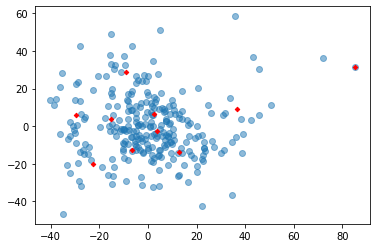

In [103]:
centers = pd.DataFrame(model.cluster_centers_)
center_x = centers[0]
center_y = centers[1]

# scatter plot
plt.scatter(finalDataFrame[0],finalDataFrame[1], alpha=0.5)#c=finalDataFrame['predict']
plt.scatter(center_x,center_y,s=10,marker='D',c='r')
plt.show()

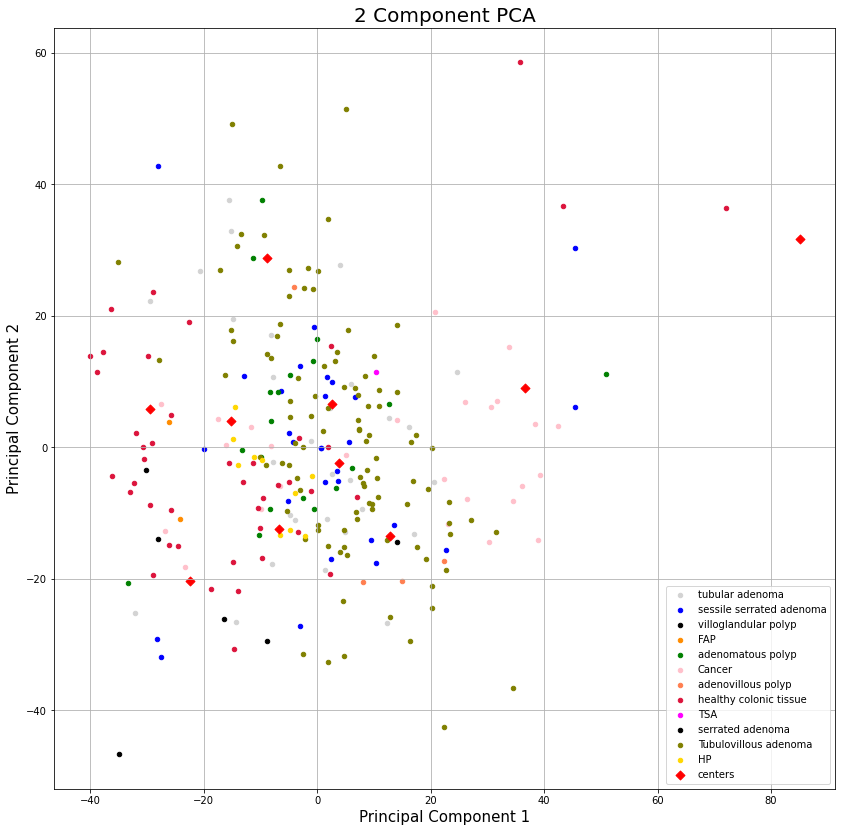

In [107]:
fig = plt.figure(figsize = (14,14))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

'''
colors = ["black","grey","lightgray","lightcoral","maroon",
         "mistyrose","coral","peachpuff","darkorange","darkgoldenrod",
         "olive","yellowgreen","lawngreen","lightgreen","g",
         "mediumseagreen","mediumaquamarine","darkslategray","c","cadetblue",
         "dodgerblue","slategrey","darkblue","rebeccapurple","crimson",
          "fuchsia"]
'''

colors=["lightgray", "blue", "black", "darkorange", "green", "pink", 
        "coral", "crimson", "fuchsia", "black", "olive", "gold", "red"]

for label, color in zip(sortedLabels, colors):
    indicesToKeep = finalDataFrame['predict'] == label
    ax.scatter(
        finalDataFrame.loc[indicesToKeep, 0]
               , finalDataFrame.loc[indicesToKeep, 1]
              
               , c = color
               , s = 20
              )

    
centers = pd.DataFrame(model.cluster_centers_)
center_x = centers[0]
center_y = centers[1]

# scatter plot
plt.scatter(center_x,center_y,s=40,marker='D',c='r')

labels=combine_sampleName+["centers"]
ax.legend(labels)
plt.savefig("PCA+IKM.png")
ax.grid()